In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import numpy as np

%matplotlib inline
sns.set(style="ticks", color_codes=True)

In [2]:
data = pd.read_csv('dataset.csv', parse_dates=['date'])
data = data.set_index('date')

In [3]:
data['2019-04-02']

,P1,P2,pressure,temperature,humidity,P1_std,P2_std,pressure_std,temperature_std,humidity_std,temp_meteo,pres_meteo,hum_meteo,wind_direction,wind_speed,precipitation,prec_amount,visibility,dew_point_temp
date,,,,,,,,,,,,,,,,,,,
2019-04-02 00:00:00,5.804000,2.891667,100264.60125,1.01375,70.91500,2.026611,0.729395,643.988619,1.594357,4.096385,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 00:05:00,6.453333,2.772000,100273.59000,1.00875,70.63375,1.974880,0.598092,642.861510,1.595407,4.270225,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 00:10:00,6.015000,2.777500,100276.52375,1.00000,70.51875,2.001031,0.626286,644.941066,1.560401,4.062557,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 00:15:00,5.991071,2.757857,100280.20625,0.98000,70.36750,1.696430,0.552361,645.041267,1.597503,4.176862,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 00:20:00,5.867500,2.703929,100281.84375,0.97125,70.20250,2.055271,0.569531,643.591465,1.600351,4.232242,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-02 23:35:00,16.971667,5.255333,100527.03875,3.74875,47.77000,7.614822,2.193313,650.333829,2.240024,6.806393,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 23:40:00,18.038000,5.139333,100525.07125,3.63875,48.15375,8.367726,1.952622,648.018155,2.266783,6.878125,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4
2019-04-02 23:45:00,16.725714,5.347857,100530.20875,3.63500,48.31500,7.153631,2.119980,649.001153,2.201117,6.800332,-1.6,99644.8628,65,"Ветер, дующий с северо-запада",2,NaN,0.1,10.0,-7.4


In [4]:
data['P1'] = data.P1.interpolate()
data['P2'] = data.P2.interpolate()
data['pressure'] = data.pressure.interpolate()
data['temperature'] = data.temperature.interpolate()
data['humidity'] = data.humidity.interpolate()
data['P1_std'] = data.P1_std.interpolate()
data['P2_std'] = data.P2_std.interpolate()
data['pressure_std'] = data.pressure_std.interpolate()
data['temperature_std'] = data.temperature_std.interpolate()
data['humidity_std'] = data.humidity_std.interpolate()

In [5]:
for c in data.columns:
    if data[c].isnull().values.any():
        print(c)

precipitation
prec_amount
visibility


In [6]:
weeks = [g for n, g in data.groupby(pd.Grouper(freq='7D'))]

In [61]:
anom_list = []
for w in weeks[:-2]:
    w['P1'] = w.P1.interpolate()
    w['P1'] = w.P1.rolling(4, min_periods=1).mean()
    freq = round(60*25/5) # 1 day
    decomp = sm.tsa.seasonal_decompose(w.P1, model='additive', freq=freq, extrapolate_trend='freq')
    q = decomp.resid.quantile(0.85)
    idx = decomp.resid[abs(decomp.resid)>q].index
    w['trend'] = decomp.trend
    w['seasonal'] = decomp.seasonal
    w['resid'] = decomp.resid
    w['anomaly'] = abs(w.resid)>q
    anomaly = w[w['anomaly']]
    anomaly['gap'] = (anomaly.index.to_series().diff()) > pd.Timedelta(10, 'm')
    l_mod = pd.to_datetime(anomaly[anomaly.gap].index)
    l_mod = l_mod.insert(0, anomaly.index[0])
    l_mod = l_mod.insert(len(l_mod), anomaly.index[-1])
    l = [anomaly[l_mod[n]:l_mod[n+1]] for n in range(0, len(l_mod)-1, 1)]
    l = [i[:-1] for i in l]
    l = [i for i in l if len(i) > 12]
    anom_list = anom_list + l

/home/anatoly/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


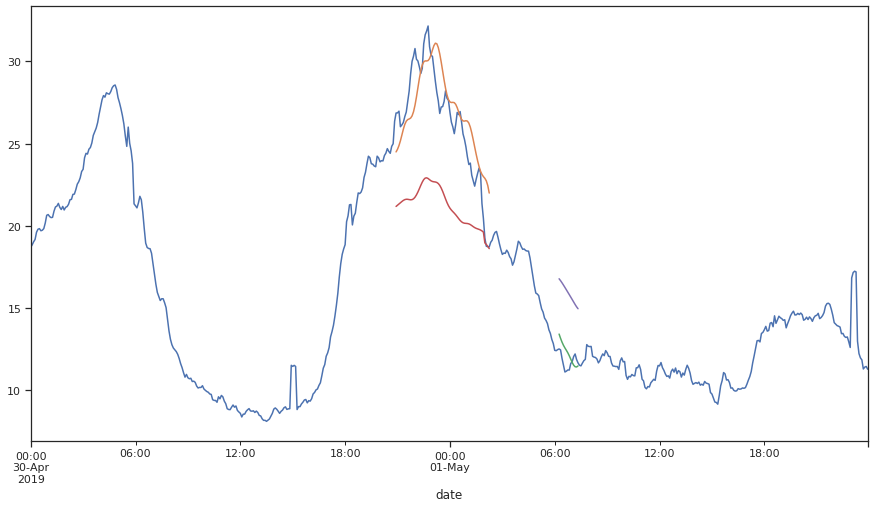

In [71]:
plt.figure(figsize=(15,8))
data['2019-04-30':'2019-05-1'].P1.plot()
anom_list[61].P1.plot()
anom_list[62].P1.plot()
(anom_list[61].trend+anom_list[61].seasonal).plot()
(anom_list[62].trend+anom_list[62].seasonal).plot()

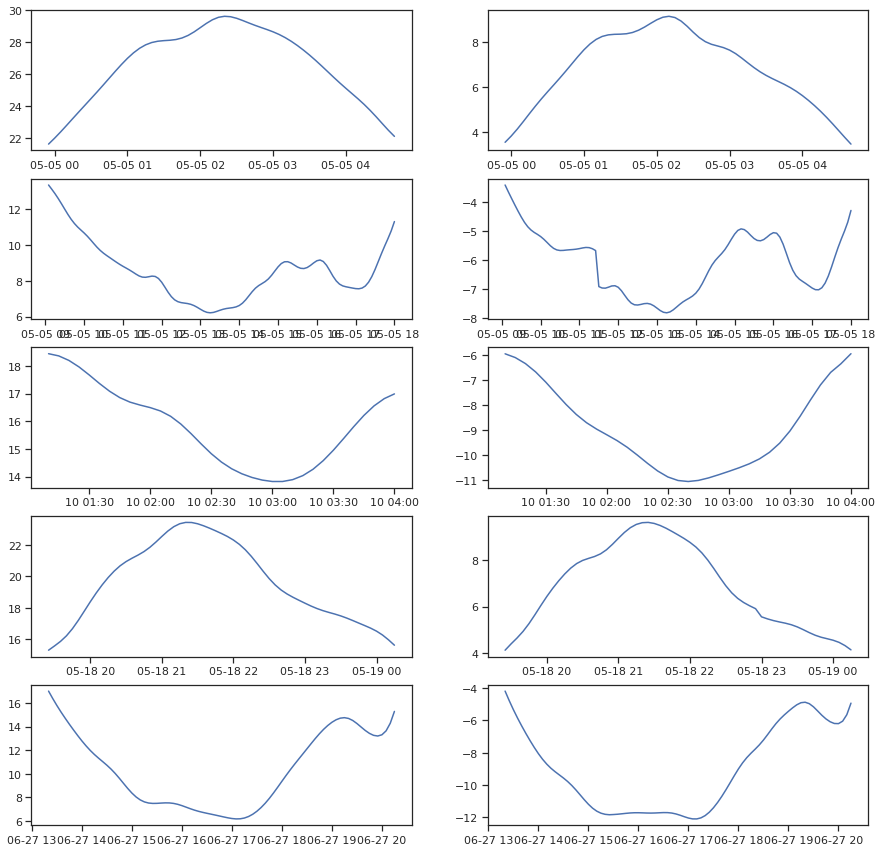

In [75]:
f, axs = plt.subplots(5,2,figsize=(15,15))
ax = 0
for i in [70, 71, 80, 91, 174]:
    axs[ax,0].plot(anom_list[i].P1)
    axs[ax,1].plot(anom_list[i].resid)
    ax += 1

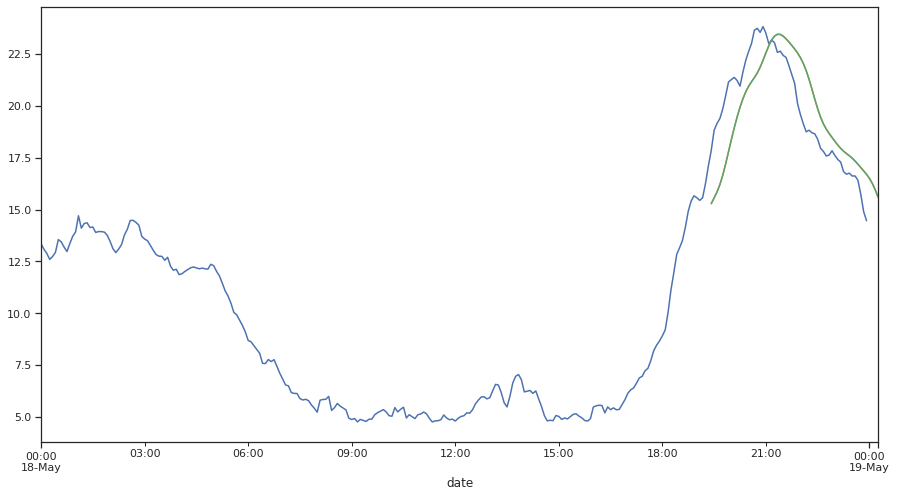

In [76]:
plt.figure(figsize=(15,8))
data['2019-05-18'].P1.plot()
anom_list[91].P1.plot()
anom_list[91].P1.plot()